In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder

from sklearn.linear_model import LinearRegression

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#  Import and read the csv.
import pandas as pd 
url="https://raw.githubusercontent.com/Wavelydavely/World_Happiness_Report/main/Cleaned_Data/WHR_Joined.csv"
happiness_df = pd.read_csv(url)
happiness_df

,country,year,world_region,happiness_score,economic_production,social_support,life_expectancy,freedom,generosity,perceptions_of_corruption
0,Denmark,2005,Western Europe,8.019,10.851,0.972,69.600,0.971,NaN,0.237
1,Denmark,2008,Western Europe,7.971,10.880,0.954,70.080,0.970,0.272,0.248
2,Finland,2020,Western Europe,7.889,10.750,0.962,72.100,0.962,-0.116,0.164
3,Finland,2018,Western Europe,7.858,10.783,0.962,71.900,0.938,-0.127,0.199
4,Finland,2021,Western Europe,7.842,10.775,0.954,72.000,0.949,-0.098,0.186
...,...,...,...,...,...,...,...,...,...,...
2093,Central African Republic,2016,Sub-Saharan Africa,2.693,6.785,0.290,44.900,0.624,0.033,0.859
2094,Syria,2013,Middle East and North Africa,2.688,8.396,0.585,58.760,0.455,0.225,0.663
2095,Afghanistan,2017,South Asia,2.662,7.697,0.491,52.800,0.427,-0.121,0.954
2096,Afghanistan,2021,South Asia,2.523,7.695,0.463,52.493,0.382,-0.102,0.924


In [14]:
happiness_df = happiness_df.dropna()

In [15]:
# Split our preprocessed data into our features and target arrays
y = happiness_df["happiness_score"] # y = dependent = ladder score
X = happiness_df[["economic_production", "social_support", "life_expectancy", "freedom", "generosity", "perceptions_of_corruption"]] # X = independent = any other variable



# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.3)

In [16]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [17]:
# Introduce regressor
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
# Print the intercept and coefficients
print("Intercept: ", regressor.intercept_)
print("Coefficients:")
list(zip(X, regressor.coef_))

Intercept:  -1.8377484327343803
Coefficients:


[('economic_production', 0.3447006594446568),
 ('social_support', 2.25262301574049),
 ('life_expectancy', 0.029718415373931606),
 ('freedom', 1.2022824621897796),
 ('generosity', 0.6786924569236568),
 ('perceptions_of_corruption', -0.7065045264861611)]

In [19]:
# Create vector of predictions
y_pred = regressor.predict(X_test)

In [20]:
print(f"Prediction: {y_pred}")

Prediction: [4.60721481 6.25549178 7.33769859 5.13004417 5.25187282 5.70614497
 7.08931873 5.34241384 4.55126921 7.02637322 5.8746382  4.59351594
 5.43181703 6.3469311  4.94748186 5.69052243 5.25048679 5.79244464
 4.63483711 5.83800701 5.23259585 5.15479657 5.56177079 6.96011398
 5.66546417 5.14717599 5.97616955 5.36120301 5.29881062 4.98781937
 5.24753384 5.17996019 6.22193853 5.94827662 5.87903722 7.22444429
 4.62483107 7.59305979 5.5936336  5.26836478 3.82414015 5.93084095
 6.48987759 4.69422395 3.75075568 5.52136604 7.30616589 4.49397888
 5.01577917 5.99255722 4.11235098 5.62806272 5.54696366 3.92074378
 7.07163219 5.88192234 4.23622757 4.55035819 5.33997565 4.81342435
 5.09923207 4.4605917  7.14355553 6.04916065 5.64605836 5.26368615
 4.29226343 5.32837432 7.32339464 6.58856725 4.0938458  5.29622816
 6.67233313 5.49565105 6.16749516 4.71917975 6.3290362  6.22219219
 4.43293143 4.2350762  6.18615201 6.03875227 5.41005443 5.33101802
 4.60390261 4.34122275 6.17090593 5.57699391 5.913

In [21]:
# Show actual value with predicted value
regressor_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
values = regressor_diff.sort_values('Actual value', ascending=False)
values

,Actual value,Predicted value
10,7.771,7.362506
13,7.683,7.270527
20,7.632,6.998947
23,7.615,6.138657
24,7.604,7.134186
...,...,...
2079,3.108,4.715504
2081,2.997,3.539476
2093,2.693,2.654397
2094,2.688,4.351729


In [22]:
#Model Evaluation
from sklearn import metrics
MAE = metrics.mean_absolute_error(y_test, y_pred)
MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('R squared: {:.2f}'.format(regressor.score(X, y)))
print('Mean Absolute Error:', MAE)
print('Mean Square Error:', MSE)
print('Root Mean Square Error:', RMSE)

R squared: 0.75
Mean Absolute Error: 0.4568330363675836
Mean Square Error: 0.36174544434409195
Root Mean Square Error: 0.6014527781497829


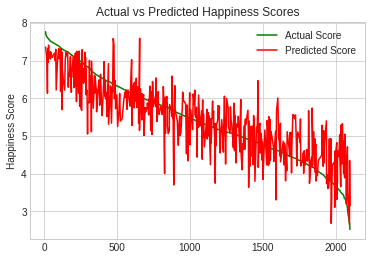

In [23]:
actual = values['Actual value']
predicted = values['Predicted value']
plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots()

ax.plot(actual, color = 'green', label = 'Actual Score')
ax.plot(predicted, color = 'red', label = 'Predicted Score')
ax.set(xlabel='', ylabel='Happiness Score',
       title='Actual vs Predicted Happiness Scores');
ax.legend(loc = 'upper right')
plt.show()

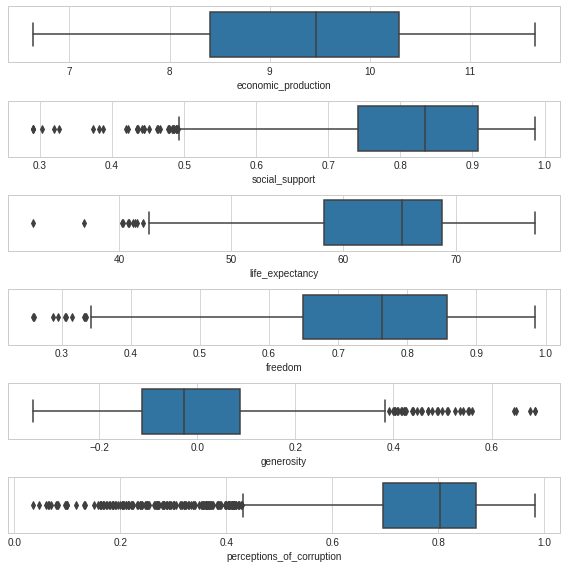

In [25]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
fig, axs = plt.subplots(6, figsize = (8,8))
plt1 = sns.boxplot(happiness_df['economic_production'], ax = axs[0])
plt2 = sns.boxplot(happiness_df['social_support'], ax = axs[1])
plt3 = sns.boxplot(happiness_df['life_expectancy'], ax = axs[2])
plt4 = sns.boxplot(happiness_df['freedom'], ax = axs[3])
plt5 = sns.boxplot(happiness_df['generosity'], ax = axs[4])
plt6 = sns.boxplot(happiness_df['perceptions_of_corruption'], ax = axs[5])
plt.tight_layout()

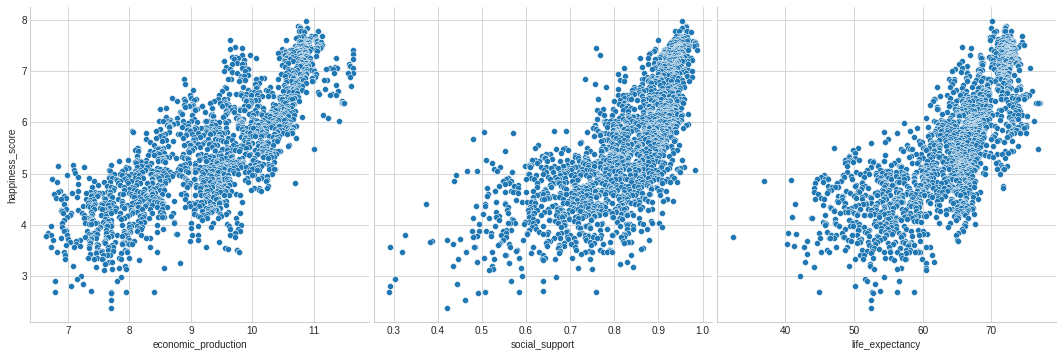

In [26]:
sns.pairplot(happiness_df, x_vars=["economic_production", "social_support", "life_expectancy"],
             y_vars="happiness_score", height=5, aspect=1, kind='scatter')
plt.show()

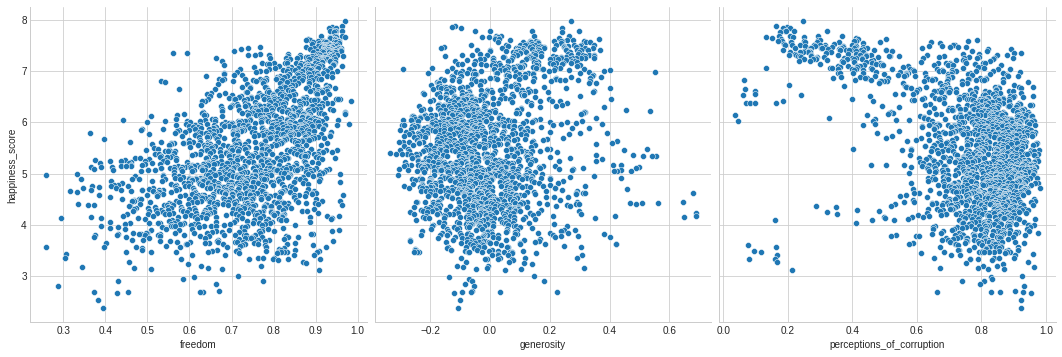

In [27]:
sns.pairplot(happiness_df, x_vars=["freedom", "generosity", "perceptions_of_corruption"],
             y_vars="happiness_score", height=5, aspect=1, kind='scatter')
plt.show()

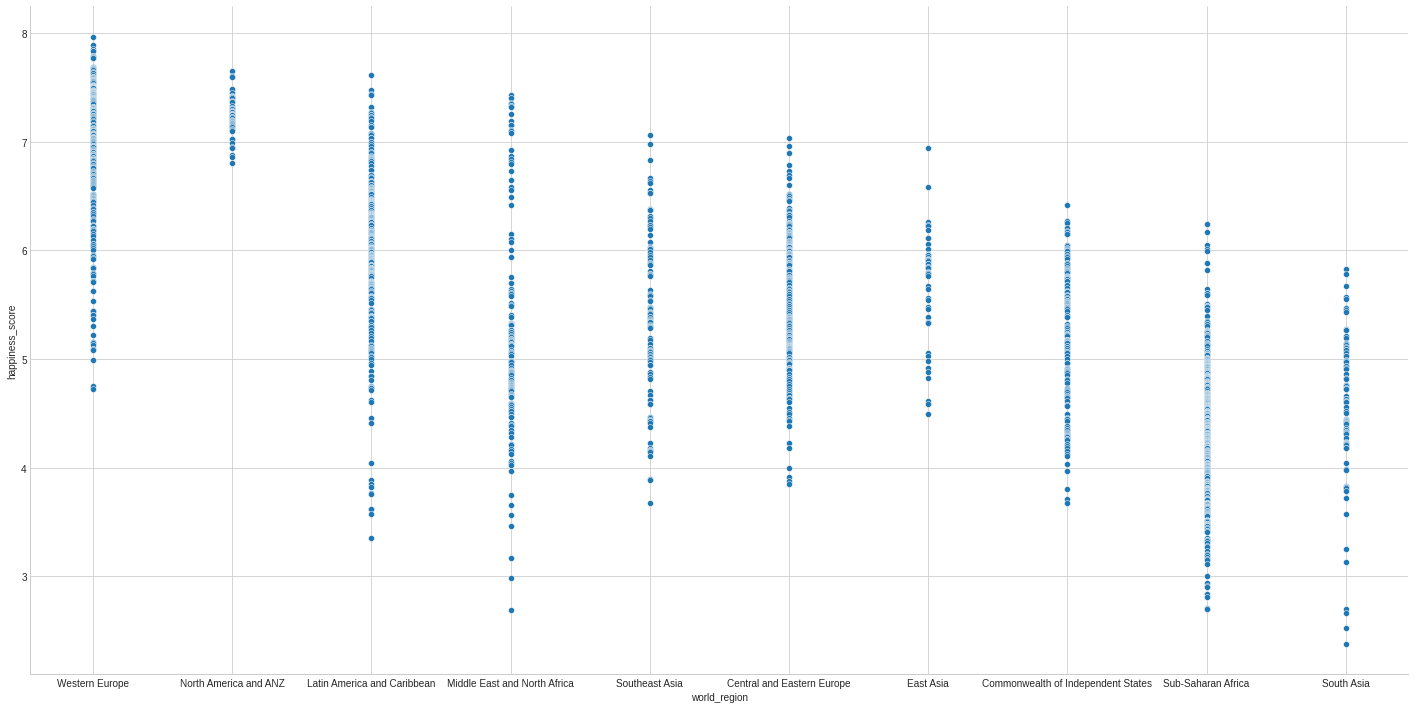

In [34]:
sns.pairplot(happiness_df, x_vars=["world_region"],
             y_vars="happiness_score", height=10, aspect=2, kind='scatter')
plt.show()

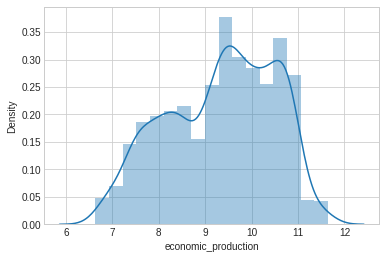

In [28]:
sns.distplot(happiness_df['economic_production'])

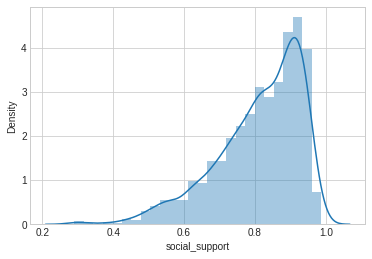

In [35]:
sns.distplot(happiness_df['social_support'])

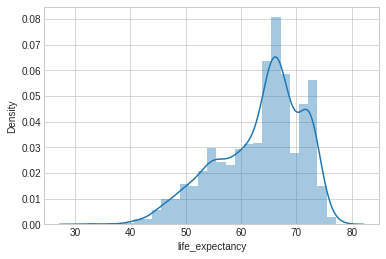

In [37]:
sns.distplot(happiness_df['life_expectancy'])

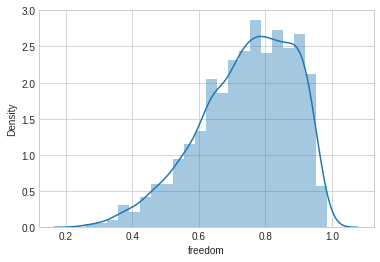

In [36]:
sns.distplot(happiness_df['freedom'])

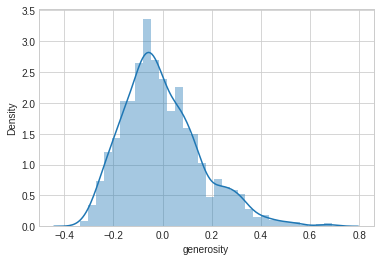

In [38]:
sns.distplot(happiness_df['generosity'])

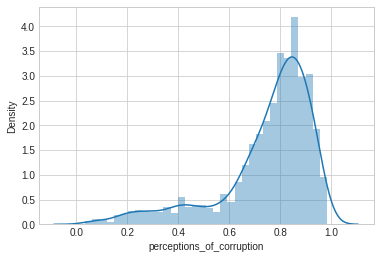

In [39]:
sns.distplot(happiness_df['perceptions_of_corruption'])